D19012 Juilee Talele - Hyperparameter tunning

### Part 1 : Hyperparameter tuning for Random Forest model

Parameters in random forest are either to increase the predictive power of the model or to make it easier to train the model. Following are the parameters we will be talking about in more details :

1. max_features:

These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features. Here are a few of them :

Auto/None : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree.
sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree.”log2″ is another similar type of option for max_features.
0.2 : This option allows the random forest to take 20% of variables in individual run. We can assign and value in a format “0.x” where we want x% of features to be considered.

How does “max_features” impact performance and speed?

Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

2. n_estimators :

This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

3. min_sample_leaf :

If you have built a decision tree before, you can appreciate the importance of minimum sample leaf size. Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Generally I prefer a minimum leaf size of more than 50. However, you should try multiple leaf sizes to find the most optimum for your use case.

4. max_depth: 

The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.

5. min_samples_split: 

The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.


Also note : Hyperparameter tuning can be advantageous in creating a model that is better at classification. In the case of a random forest, it may not be necessary, as random forests are already very good at classification. 


#### Carefully and methodically adjusting hyperparameters can be advantageous. It can make your classification model more accurate, which will lead to more accurate predictions overall. Let's verify by tuning some parameters :

In [1]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)

import os

In [2]:
os.chdir(r"C:\Users\lenovo\Desktop\Praxis\Practice_doc\Python")

In [3]:
df= pd.read_csv("winequality.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
def tasty(quality):
    if quality > 6:
        return 1
    else:
        return 0

df['quality'] = df['quality'].apply(tasty)
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [7]:
y = df['quality']
x = df.drop('quality', axis = 1)

In [8]:
## Balancing the dataset using SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_sample(x,y)

import sklearn

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x_res,y_res,test_size = 0.3, random_state = 50)


#### Let's fit a model on all default parameters and observe the output

In [9]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier()        # NOTE : Without giving any parameters (Model will take all default values)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
pred_y = clf.predict(x_test)

In [11]:
# To check the accuracy of the model
#score = accuracy_score(y_test, y_score,normalize=False)
score = accuracy_score(y_test, pred_y)
score

0.9289156626506024

#### NOTE : The accuracy without any parameter tunning is 68%

#### Hyperparameter tunning for Random Forest Model :

1. sample_leaf_options

In [12]:
# creating a list of different sample_leaf_options
sample_leaf_options = [1,2,3,4,5,10,20]
#sample_leaf_options = [1,20,50,100]

# for loop to iterate for each sample_leaf_options
for leaf_size in sample_leaf_options :
    model = RandomForestClassifier(min_samples_leaf = leaf_size)
    model = model.fit(x_train,y_train)
    pred_y = model.predict(x_test)
    print("\n Leaf size :", leaf_size)
    print ("Accuracy : ", accuracy_score(y_test,pred_y))
#    print(pd.crosstab(y_test, y_score, rownames=['Actual Quality'], colnames=['Predicted Quality']))


 Leaf size : 1
Accuracy :  0.9253012048192771

 Leaf size : 2
Accuracy :  0.9132530120481928

 Leaf size : 3
Accuracy :  0.9204819277108434

 Leaf size : 4
Accuracy :  0.9024096385542169

 Leaf size : 5
Accuracy :  0.9048192771084337

 Leaf size : 10
Accuracy :  0.8879518072289156

 Leaf size : 20
Accuracy :  0.8566265060240964


Observation : Leaf size 1 has maximum accuracy

2. min_samples_split

In [13]:
# creating a list of different min_samples_split
min_samples_split = [2, 5, 10, 15, 100,200]

# for loop to iterate for each min_samples_split
for i in min_samples_split :
    model = RandomForestClassifier(min_samples_split = i)
    model = model.fit(x_train,y_train)
    pred_y = model.predict(x_test)
    print("\n min_samples_split:", i)
    print ("Accuracy : ", accuracy_score(y_test, pred_y))


 min_samples_split: 2
Accuracy :  0.927710843373494

 min_samples_split: 5
Accuracy :  0.9265060240963855

 min_samples_split: 10
Accuracy :  0.9228915662650602

 min_samples_split: 15
Accuracy :  0.908433734939759

 min_samples_split: 100
Accuracy :  0.8578313253012049

 min_samples_split: 200
Accuracy :  0.8433734939759037


Observation : min_samples_split: 10 has highest accuracy

3. n_estimators

In [14]:
n_estimators = [100, 300, 500, 800, 1200]

# for loop to iterate for each n_estimators
for i in n_estimators :
    model = RandomForestClassifier(n_estimators = i)
    model = model.fit(x_train,y_train)
    pred_y = model.predict(x_test)
    print("\n n_estimators:", i)
    print ("Accuracy : ", accuracy_score(y_test, pred_y))


 n_estimators: 100
Accuracy :  0.9265060240963855

 n_estimators: 300
Accuracy :  0.9253012048192771

 n_estimators: 500
Accuracy :  0.9228915662650602

 n_estimators: 800
Accuracy :  0.9289156626506024

 n_estimators: 1200
Accuracy :  0.9228915662650602


Observation : n_estimators: 800 has highest accuracy

4. max_depth

In [15]:
max_depth = [10,15,20,25,30]

# for loop to iterate for each n_estimators
for i in max_depth :
    model = RandomForestClassifier(max_depth = i)
    model = model.fit(x_train,y_train)
    pred_y = model.predict(x_test)
    print("\n max_depth:", i)
    print ("Accuracy : ", accuracy_score(y_test, pred_y))


 max_depth: 10
Accuracy :  0.9168674698795181

 max_depth: 15
Accuracy :  0.9337349397590361

 max_depth: 20
Accuracy :  0.9216867469879518

 max_depth: 25
Accuracy :  0.9253012048192771

 max_depth: 30
Accuracy :  0.9325301204819277


Observation : max_depth: 30 has the highest accuracy

#### Placing all the observed parameters together to get the overall accuracy

In [29]:
model = RandomForestClassifier(max_depth = 30, n_estimators = 800, min_samples_split = 10, min_samples_leaf= 1)
model = model.fit(x_train,y_train)
pred_y = model.predict(x_test)
print ("Accuracy : ", accuracy_score(y_test, pred_y))

Accuracy :  0.9156626506024096


#### NOTE : After tunning the parameters of random forest model (hyperparameter)
#### The accuracy of the model is increased by 0.052 

## Part 2 : Hyperparameter tunning for Bagging

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#### Initial model 

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = sklearn.ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=50, oob_score=True)
model.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [19]:
from sklearn.metrics import roc_curve, accuracy_score

In [20]:
pred_y = model.predict(x_test)

In [21]:
print('Accuracy of the model on test data:',round(accuracy_score(y_test,pred_y)*100,2),"%")

Accuracy of the model on test data: 92.17 %


#### 1. n_estimator

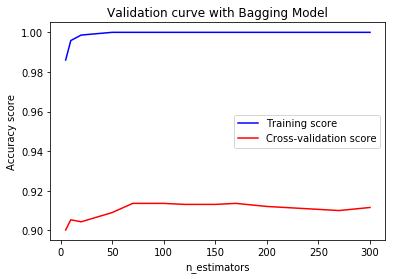

Output:
Training data -  Accuracy:  100.0 for n_estimators:  170
Test data -  Accuracy:  91.36 for n_estimators:  170


In [22]:
from sklearn.model_selection import validation_curve

from sklearn.tree import DecisionTreeClassifier

clf = sklearn.ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True, random_state=50)

n_estimator = [5,10,20,50,70,100,120,150,170,200,270,300]

train_score, test_score = validation_curve(clf, x_train, y_train,'n_estimators',n_estimator,cv=4,
                                           scoring='accuracy',n_jobs=-1)

train_scores_mean = np.mean(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)

#plotting train and test error
plt.plot(n_estimator, train_scores_mean, label="Training score",color="blue")
plt.plot(n_estimator, test_scores_mean, label="Cross-validation score",color="red")
plt.title("Validation curve with Bagging Model")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.legend(loc = 'best')
plt.show()

estimate = n_estimator[test_scores_mean.argmax()]

print('Output:')

print('Training data - ','Accuracy: ',round(train_scores_mean.max()*100,2), 'for n_estimators: ',estimate)
print('Test data - ','Accuracy: ',round(test_scores_mean.max()*100,2), 'for n_estimators: ',estimate)

#### 2. max_sample

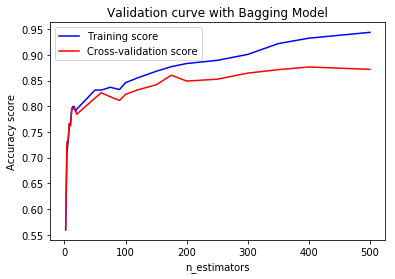

Output:
Training data -  Accuracy:  94.38 for max_samples:  400
Test data -  Accuracy:  87.64 for max_samples:  400


In [23]:
from sklearn.model_selection import validation_curve

from sklearn.tree import DecisionTreeClassifier

clf = sklearn.ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True, random_state=50)

max_sample = [2,4,6,8,10,12,14,16,18,20,50,60,75,90,100,120,150,175,200,250,300,350,400,500]

train_score, test_score = validation_curve(clf, x_train, y_train,'max_samples',max_sample,cv=4,
                                           scoring='accuracy',n_jobs=-1)

train_scores_mean = np.mean(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)

#plotting train and test error
plt.plot(max_sample, train_scores_mean, label="Training score",color="blue")
plt.plot(max_sample, test_scores_mean, label="Cross-validation score",color="red")
plt.title("Validation curve with Bagging Model")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.legend(loc = 'best')
plt.show()

estimate = max_sample[test_scores_mean.argmax()]

print('Output:')

print('Training data - ','Accuracy: ',round(train_scores_mean.max()*100,2), 'for max_samples: ',estimate)
print('Test data - ','Accuracy: ',round(test_scores_mean.max()*100,2), 'for max_samples: ',estimate)

#### 3. max_feature

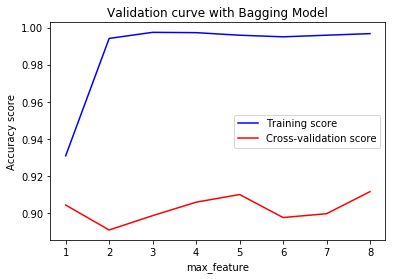

Output:
Training data -  Accuracy:  99.74 for max_features:  8
Test data -  Accuracy:  91.16 for max_features:  8


In [24]:
max_feature = [1,2,3,4,5,6,7,8]

train_score, test_score = validation_curve(clf, x_train, y_train,'max_features',max_feature,
                                           cv=4,scoring='accuracy',n_jobs=-1)

train_scores_mean = np.mean(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)

#plotting train and test error
plt.plot(max_feature, train_scores_mean, label="Training score",color="blue")
plt.plot(max_feature, test_scores_mean, label="Cross-validation score",color="red")
plt.title("Validation curve with Bagging Model")
plt.xlabel("max_feature")
plt.ylabel("Accuracy score")
plt.legend(loc = 'best')
plt.show()

estimate = max_feature[test_scores_mean.argmax()]

print('Output:')

print('Training data - ','Accuracy: ',round(train_scores_mean.max()*100,2), 'for max_features: ',estimate)
print('Test data - ','Accuracy: ',round(test_scores_mean.max()*100,2), 'for max_features: ',estimate)

In [25]:
from sklearn.model_selection import RandomizedSearchCV

tuning_parameters = [{'max_features': [1,2,3,4,5,6,7,8],
                      'max_samples': [150,175,200,250,300,350,400,500],
                     'n_estimators': [5,10,20,50,70,100,120,150,170,200,270,300]}]

bag_model = sklearn.ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=50, oob_score=True)

bag_grid = RandomizedSearchCV(estimator=bag_model, n_iter = 100,param_distributions=tuning_parameters,
                             n_jobs=-1,cv= 4, scoring='accuracy')

bag_grid.fit(x_train,y_train)

print('best parameters: ',bag_grid.best_params_)

best parameters:  {'n_estimators': 270, 'max_samples': 400, 'max_features': 2}


In [26]:
RSCV_model = sklearn.ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier(),max_features=2,
                                                max_samples=400,n_estimators=70,random_state=50, oob_score=True)
RSCV_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [27]:
VC_model = sklearn.ensemble.BaggingClassifier(base_estimator=DecisionTreeClassifier(),max_features=2,
                                                max_samples=400,n_estimators=70,random_state=50, oob_score=True)
VC_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [28]:
# Confusion Matrix, ROC_AUC_Score and Accuracy Score

from sklearn.metrics import accuracy_score

print('Accuracy of the model on test data:',round(accuracy_score(y_test,VC_model.predict(x_test))*100,2),"%")


Accuracy of the model on test data: 92.05 %


**Final Observation:**
    
        When n_estimators = 70, model got 92.05 % accuracy, So we will use n_estimators = 70, max_featues = 2 and max_samples = 400 for a good model.

**Observation:**
    1. Bagging Model has a accuracy of 92.05 % and RandomForest Model after tunning hyperparameter has a accuracy of 91.56% on this dataset.